In [ ]:
import csv
from getpass import getpass
from time import sleep 

from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchAttributeException
from selenium.webdriver import Chrome

In [ ]:
driver = Chrome()

In [ ]:
driver.get('https://twitter.com/login')

In [ ]:
username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('jamazichiheb')

In [ ]:
my_password = getpass()

In [ ]:
password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys('Seawaymn2011&&')

In [ ]:
password.send_keys(Keys.RETURN) #same action action as clicking login button

In [ ]:
search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')

In [ ]:
search_input.send_keys('#Epilepsy')

In [ ]:
search_input.send_keys(Keys.RETURN)

In [ ]:
driver.find_element_by_link_text('Latest').click()

In [ ]:
cards = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')

In [ ]:
card = cards[9]

In [ ]:
card.find_element_by_xpath('./div[2]/div[1]//span').text

In [ ]:
card.find_element_by_xpath('.//span[contains(text(), "@")]').text

In [ ]:
#content of the tweet 
comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
comment+responding

In [ ]:
def get_tweet_data(card):
    #extract data from tweet
    username = card.find_element_by_xpath('./div[2]/div[1]//span').text
    handle = card.find_element_by_xpath('.//span[contains(text(), "@")]').text
    try:
        postdate = card.find_element_by_xpath('.//time').get_attribute('datetime')
    except NoSuchAttributeException:
        return
    comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
    responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
    df = comment+responding
    tweet = (username, handle, df)
    return tweet

In [ ]:
get_tweet_data(card)

In [ ]:
tweet_data = []
for card in cards: 
    data=get_tweet_data(card)
    if data:
        tweet_data.append(data)

In [ ]:
tweet_data[5]

In [ ]:
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [ ]:
## Puting it all toghether

In [ ]:
import csv
from getpass import getpass
from time import sleep 
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchAttributeException
from selenium.webdriver import Chrome



def get_tweet_data(card):
    #extract data from tweet
    username = card.find_element_by_xpath('./div[2]/div[1]//span').text
    handle = card.find_element_by_xpath('.//span[contains(text(), "@")]').text
    try:
        postdate = card.find_element_by_xpath('.//time').get_attribute('datetime')
    except NoSuchAttributeException:
        return
    comment = card.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
    responding = card.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
    df = comment+responding
    tweet = (username, handle, df)
    return tweet

driver = Chrome()

driver.get('https://twitter.com/login')


##


In [ ]:
username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('jamazichiheb')


password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys("Seawaymn2011&&")
password.send_keys(Keys.RETURN)



In [ ]:
search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')
search_input.send_keys('#epilepsywarrior')
search_input.send_keys(Keys.RETURN)

driver.find_element_by_link_text('Latest').click()

data = []
tweet_ids = set()
last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True
while scrolling:
    page_cards = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')
    for card in page_cards[-15:]: 
        tweet= get_tweet_data(card)
        if tweet:
            tweet_id = ''.join(tweet)
            if tweet_id not in tweet_ids:
                tweet_ids.add(tweet_id)
                data.append(tweet)
    
    scroll_attempt = 0 
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(1)
        curr_position = driver.execute_script("return window.pageYOffset;")
        if last_position == curr_position:
            scroll_attempt += 1
            if scroll_attempt >= 3:
                scrolling = False
                break
            else:
                sleep(2)
        else:
            last_position = curr_position
            break

In [ ]:
len(data)

In [ ]:
with open('epiplsy_tweets.csv', 'w' ,newline='', encoding='utf-8') as f:
    header=['Username','Handle','Text']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

In [ ]:
pip install pycaret

     |████████████████████████████████| 266kB 4.0MB/s 
     |████████████████████████████████| 6.8MB 30.6MB/s 
     |████████████████████████████████| 112kB 26.1MB/s 
     |████████████████████████████████| 276kB 35.5MB/s 
     |████████████████████████████████| 2.0MB 31.7MB/s 
     |████████████████████████████████| 1.7MB 35.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 32.2MB/s 
     |████████████████████████████████| 14.2MB 192kB/s 
     |████████████████████████████████| 256kB 32.8MB/s 
     |████████████████████████████████| 1.4MB 29.7MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 174kB 33.7MB/s 
     |████████████████████████████████| 153kB 43.1MB/s 
     |████████████████████████████████| 81kB 7.4MB/s

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.nlp import *

# sentimenl analysis

In [ ]:
from google.colab import drive
drive.mount('/content/ColabNotebooks')

Drive already mounted at /content/ColabNotebooks; to attempt to forcibly remount, call drive.mount("/content/ColabNotebooks", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/ColabNotebooks/MyDrive/epiplsy_tweets.csv')

In [ ]:
df.shape

(1164, 3)

In [ ]:
df.head()

,Username,Handle,Text
0,My Epilepsy Journey,@EpilepsyMy,“Failure doesn’t come from falling down. Failu...
1,My Epilepsy Journey,@EpilepsyMy,“You can have results or excuses. Not both.” #...
2,Epilepsy Reach,@EpilepsyReach,A study published last year claims that listen...
3,The Chelsea Hutchison Foundation,@ChelseasLegacy,Happy St Patricks Day! May the luck of the Ir...
4,Grey/Bruce Epilepsy Awareness,@GBepilepsy,Day 17 of #march26daysofepilepsy for #epilepsy...


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df.drop(['Username', 'Handle'], axis=1,inplace = True)

In [ ]:
# clean the text
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#remved @mentions
    text= re.sub(r'#', '', text) #removig hashtags
    text= re.sub(r'@', '', text)
    text = re.sub(r'RT[\s]+', '',text) 
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper links
    return text

df['Text'] = df['Text'].apply(cleantext)
df

,Text
0,“Failure doesn’t come from falling down. Failu...
1,“You can have results or excuses. Not both.” m...
2,A study published last year claims that listen...
3,Happy St Patricks Day! May the luck of the Ir...
4,Day 17 of march26daysofepilepsy for epilepsyaw...
...,...
1159,When you travel to Colorado with your BFF to c...
1160,Camp drop off \n thank you epilepsyfoundation_...
1161,Birthday special on the Fin comps! fundraising...
1162,Let’s all wish epilepsywarrior \n_neuroninja\n...


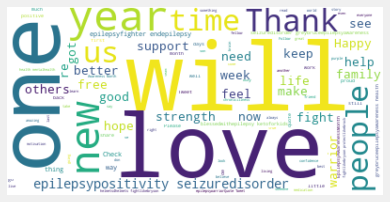

In [ ]:
#plot the word cloud 
stopwords = set(STOPWORDS)
stopwords.update(["epilepsy", "epilepsyawareness", "epilepsywarrior","Replying",".","know","seizures","day","today","seizure","s"])
allwords = ' '.join([twts for twts in df['Text']])
wordcloud = WordCloud(stopwords=stopwords,max_font_size=100, max_words=100, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("first_review.png")

In [ ]:
#create a funtion to get the subjectivity 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new clumns
df['Subjectivity'] = df ['Text'].apply(getSubjectivity)
df['Polarity'] = df ['Text'].apply(getPolarity)
df

,Text,Subjectivity,Polarity
0,“Failure doesn’t come from falling down. Failu...,0.348148,0.118519
1,“You can have results or excuses. Not both.” m...,0.400000,0.500000
2,A study published last year claims that listen...,0.173737,0.024621
3,Happy St Patricks Day! May the luck of the Ir...,0.711111,0.433333
4,Day 17 of march26daysofepilepsy for epilepsyaw...,0.333333,0.250000
...,...,...,...
1159,When you travel to Colorado with your BFF to c...,0.333333,0.312500
1160,Camp drop off \n thank you epilepsyfoundation_...,0.900000,0.900000
1161,Birthday special on the Fin comps! fundraising...,0.571429,0.446429
1162,Let’s all wish epilepsywarrior \n_neuroninja\n...,0.579630,0.345833


In [ ]:
#create a function to compute the negative , neutral and posiive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(10)

,Text,Subjectivity,Polarity,Analysis
0,“Failure doesn’t come from falling down. Failu...,0.348148,0.118519,Positive
1,“You can have results or excuses. Not both.” m...,0.400000,0.500000,Positive
2,A study published last year claims that listen...,0.173737,0.024621,Positive
3,Happy St Patricks Day! May the luck of the Ir...,0.711111,0.433333,Positive
4,Day 17 of march26daysofepilepsy for epilepsyaw...,0.333333,0.250000,Positive
5,Amazing messages from these Gr 1's!! We can't ...,0.700000,0.468750,Positive
6,Why should epilepsy patients have a monitoring...,0.700000,0.562500,Positive
7,epilepsyawareness epilepsywarrior advocate adv...,0.616667,0.270833,Positive
8,"Our Board Member, Katelynn Thibert, shares why...",0.000000,0.000000,Neutral
9,Epilepsy and Seizures\n\nWould you know what t...,0.000000,-0.050000,Negative


In [ ]:
df["Analysis"].value_counts()

Positive    646
Neutral     266
Negative    252
Name: Analysis, dtype: int64

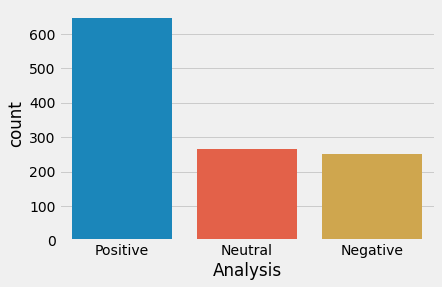

In [ ]:
import seaborn as sns
sns.countplot(x=df["Analysis"])

Text(0, 0.5, 'Subjectivity')

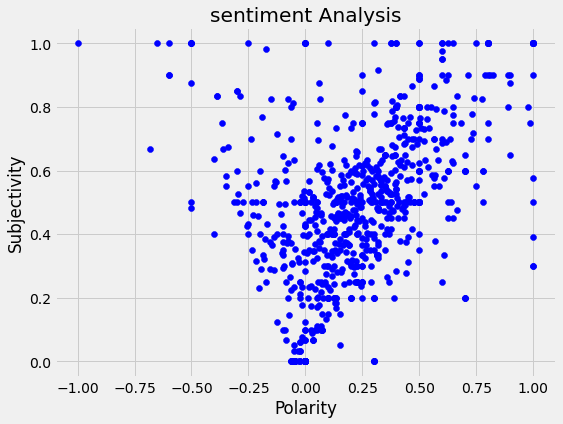

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color ='Blue')
    
plt.title('sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
exp_nlp101 = setup(data = df, target = 'Text', session_id = 123,
                   custom_stopwords = ['epilepsywarrior', 'epilepsy', 'com', 'day', 'year', 'go', 'http', 'free', 
                                       'let', 'post','use', 'people', 'never', 'want', 'even','seizures','seizure'],)

Description,Value
session_id,123
Documents,1164
Vocab Size,2605
Custom Stopwords,True


In [ ]:
lda = create_model('lda')

In [ ]:
print(lda)

LdaModel(num_terms=2605, num_topics=4, decay=0.5, chunksize=100)


In [ ]:
lda_results = assign_model(lda)
lda_results.head()

,Text,Subjectivity,Polarity,Analysis,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,failure come fall failure come get motivation ...,0.348148,0.118519,Positive,0.015099,0.016095,0.922349,0.046456,Topic 2,0.92
1,result excuse motivation happiness warrior pos...,0.400000,0.500000,Positive,0.018490,0.019794,0.903564,0.058152,Topic 2,0.90
2,study publish last claim listen may reduce fre...,0.173737,0.024621,Positive,0.648097,0.014657,0.073516,0.263730,Topic 0,0.65
3,may luck irish sure feel lucky life luck lucky...,0.711111,0.433333,Positive,0.203733,0.028040,0.601630,0.166598,Topic 2,0.60
4,lead purpleday first time witness mentalhealth,0.333333,0.250000,Positive,0.038361,0.041040,0.210672,0.709928,Topic 3,0.71


In [ ]:
plot_model()

In [ ]:
plot_model(plot = 'bigram')

In [ ]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [ ]:
plot_model(lda, plot = 'topic_distribution')

In [ ]:
plot_model(lda, plot = 'tsne')

In [ ]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [ ]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7fdeeae75dd0>,
 'Final LDA Model 08Feb2020.pkl')

In [ ]:
saved_lda = load_model('Final LDA Model 08Feb2020')

print(saved_lda)

Model Sucessfully Loaded
LdaModel(num_terms=2605, num_topics=4, decay=0.5, chunksize=100)
